In [37]:
# read in filtered_deployments_with_organizations.csv as df
import pandas as pd
deployments_with_orgs = pd.read_csv('filtered_deployments_with_organizations.csv')
deployments_with_orgs.head()

,organization_id,platform_id,platform,name,votes_count,proposals_count,website,additional,organization_type
0,005ea4e2-624a-46f0-a7cd-1967d95d4092,jamm,snapshot,JAMM,90,17,https://snapshot.org/#/jamm,NaN,deepdao
1,00629fde-3af9-5b54-8135-c3d5a78b9c30,nuetaalumniassociation.eth,snapshot,Nu Eta Alumni Association,84,30,https://snapshot.org/#/nuetaalumniassociation.eth,NaN,single
2,007486f5-4ac2-5c2a-9959-a125213e8966,0x.me.eth.id,snapshot,0xme,61,31,https://snapshot.org/#/0x.me.eth.id,NaN,single
3,008e1906-6dac-5870-bdfd-14a1ae86aab3,ethlyn.eth,snapshot,SebastianMagpuDAO,157,17,https://snapshot.org/#/ethlyn.eth,NaN,single
4,008ff65f-0624-566a-b4b8-e18c1d7bdd27,0xf9c01988e5fd3769f530e729b8320294fc51a503,daohaus,PoolWORKs V1 Liquidity Providers DAO,94,72,NaN,network: polygon version: 2.1,single


In [38]:
import glob

# find the *_proposals.csv files in ../DATA/proposals
proposals_csvs = glob.glob('../DATA/proposals/*_proposals.csv')

# read the proposals into a single concatenated dataframe
proposals = pd.concat([pd.read_csv(f) for f in proposals_csvs])
proposals.head()

,platform,platform_deployment_id,proposal_id,author,date,votes_count
0,daostack,0x294f999356ed03347c7a23bcbcf8d33fa41dc830,0x0025c38d987acba1f1d446d3690384327ebe06d15f1f...,0xbaaea72417f4dc3e0f52a1783b0913d0f3516634,2019-10-22 10:07:58,8
1,daostack,0x39757e7cdb7022c3829195d57b29428d79593c9d,0x0033a337b620add50be9ba0fff1128ab866ece51cfdd...,0x052c68abe8e4bf0b78925e488b98f6fdc18a3af9,2020-01-17 19:07:19,1
2,daostack,0x519b70055af55a007110b4ff99b0ea33071c720a,0x003c109411e96e5607ce609278536262e12afdaa65ab...,0xb33b9fba681653fe263b31a95766d83d18c2128d,2020-03-14 17:52:32,5
3,daostack,0x8990e11b69403ea53ef2b32434bbd7dbf84b5234,0x0071c649968f7939fc9729c5dc25a8ae3f50dc86220a...,0x86fd6dd41bad636b5b3b9228bc5642fa0df392e8,2019-12-14 14:52:54,1
4,daostack,0x440583455bcd85ab2bd429c015d3aabcae135f0a,0x007eaf0fc8d6ae35ba3f28bc7cf4b34af659db8161d4...,0x7cb9032844e722bef2e16a761832c59c96550898,2019-11-01 19:26:29,1


In [39]:
proposals.shape

(95570, 6)

In [40]:
_deployments_with_orgs_pre_merge = deployments_with_orgs[['platform', 'platform_id', 'organization_id', 'organization_type']]
# rename platfrom id to platform_deployment_id
_deployments_with_orgs_pre_merge = _deployments_with_orgs_pre_merge.rename(columns={'platform_id': 'platform_deployment_id'})
_deployments_with_orgs_pre_merge.head()

,platform,platform_deployment_id,organization_id,organization_type
0,snapshot,jamm,005ea4e2-624a-46f0-a7cd-1967d95d4092,deepdao
1,snapshot,nuetaalumniassociation.eth,00629fde-3af9-5b54-8135-c3d5a78b9c30,single
2,snapshot,0x.me.eth.id,007486f5-4ac2-5c2a-9959-a125213e8966,single
3,snapshot,ethlyn.eth,008e1906-6dac-5870-bdfd-14a1ae86aab3,single
4,daohaus,0xf9c01988e5fd3769f530e729b8320294fc51a503,008ff65f-0624-566a-b4b8-e18c1d7bdd27,single


In [41]:
proposals_with_orgs = proposals.merge(_deployments_with_orgs_pre_merge, on=['platform_deployment_id', 'platform'], how='left', validate='m:1')
proposals_with_orgs.head()

,platform,platform_deployment_id,proposal_id,author,date,votes_count,organization_id,organization_type
0,daostack,0x294f999356ed03347c7a23bcbcf8d33fa41dc830,0x0025c38d987acba1f1d446d3690384327ebe06d15f1f...,0xbaaea72417f4dc3e0f52a1783b0913d0f3516634,2019-10-22 10:07:58,8,3668a12c-85eb-45c8-ac83-aae266de29e3,deepdao
1,daostack,0x39757e7cdb7022c3829195d57b29428d79593c9d,0x0033a337b620add50be9ba0fff1128ab866ece51cfdd...,0x052c68abe8e4bf0b78925e488b98f6fdc18a3af9,2020-01-17 19:07:19,1,NaN,NaN
2,daostack,0x519b70055af55a007110b4ff99b0ea33071c720a,0x003c109411e96e5607ce609278536262e12afdaa65ab...,0xb33b9fba681653fe263b31a95766d83d18c2128d,2020-03-14 17:52:32,5,c9db5a89-025e-4cfd-9a7f-552d86add137,deepdao
3,daostack,0x8990e11b69403ea53ef2b32434bbd7dbf84b5234,0x0071c649968f7939fc9729c5dc25a8ae3f50dc86220a...,0x86fd6dd41bad636b5b3b9228bc5642fa0df392e8,2019-12-14 14:52:54,1,a7ebb52d-cfeb-479d-ba4f-21e460eb1773,deepdao
4,daostack,0x440583455bcd85ab2bd429c015d3aabcae135f0a,0x007eaf0fc8d6ae35ba3f28bc7cf4b34af659db8161d4...,0x7cb9032844e722bef2e16a761832c59c96550898,2019-11-01 19:26:29,1,5d553ae9-09db-595b-8ca9-413b792a1def,single


In [42]:
proposals_with_orgs['organization_id'].isnull().sum() / proposals_with_orgs.shape[0]

0.29268598932719475

In [43]:
# 30% of these are null, we should be able to say that is because of the upstream filtering of deployments_with_orgs to only include large orgs
# with this in mind, let's drop the nulls
proposals_with_orgs = proposals_with_orgs.dropna(subset=['organization_id'])
proposals_with_orgs.shape

(67598, 8)

In [44]:
proposals_with_orgs.head()

,platform,platform_deployment_id,proposal_id,author,date,votes_count,organization_id,organization_type
0,daostack,0x294f999356ed03347c7a23bcbcf8d33fa41dc830,0x0025c38d987acba1f1d446d3690384327ebe06d15f1f...,0xbaaea72417f4dc3e0f52a1783b0913d0f3516634,2019-10-22 10:07:58,8,3668a12c-85eb-45c8-ac83-aae266de29e3,deepdao
2,daostack,0x519b70055af55a007110b4ff99b0ea33071c720a,0x003c109411e96e5607ce609278536262e12afdaa65ab...,0xb33b9fba681653fe263b31a95766d83d18c2128d,2020-03-14 17:52:32,5,c9db5a89-025e-4cfd-9a7f-552d86add137,deepdao
3,daostack,0x8990e11b69403ea53ef2b32434bbd7dbf84b5234,0x0071c649968f7939fc9729c5dc25a8ae3f50dc86220a...,0x86fd6dd41bad636b5b3b9228bc5642fa0df392e8,2019-12-14 14:52:54,1,a7ebb52d-cfeb-479d-ba4f-21e460eb1773,deepdao
4,daostack,0x440583455bcd85ab2bd429c015d3aabcae135f0a,0x007eaf0fc8d6ae35ba3f28bc7cf4b34af659db8161d4...,0x7cb9032844e722bef2e16a761832c59c96550898,2019-11-01 19:26:29,1,5d553ae9-09db-595b-8ca9-413b792a1def,single
5,daostack,0x519b70055af55a007110b4ff99b0ea33071c720a,0x00a6fff3bc39d362f1153029f9105ea14c080ebbf475...,0xd97672177e0673227fa102c91bfa8b8cfa825141,2021-08-15 11:51:26,1,c9db5a89-025e-4cfd-9a7f-552d86add137,deepdao


## authorship

In [45]:
# group by organization_id and count the number of unique authors and the number of total proposals
proposal_authorship_stats = proposals_with_orgs.groupby('organization_id').agg({'author': 'nunique', 'proposal_id': 'count'}).sort_values('author', ascending=False)

<Axes: >

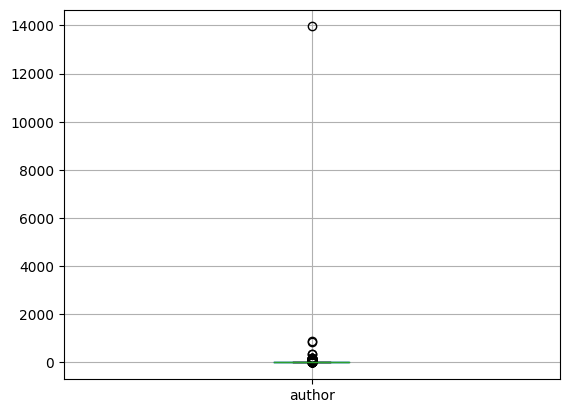

In [51]:
# author boxplot
proposal_authorship_stats.boxplot(column=['author'])

<Axes: >

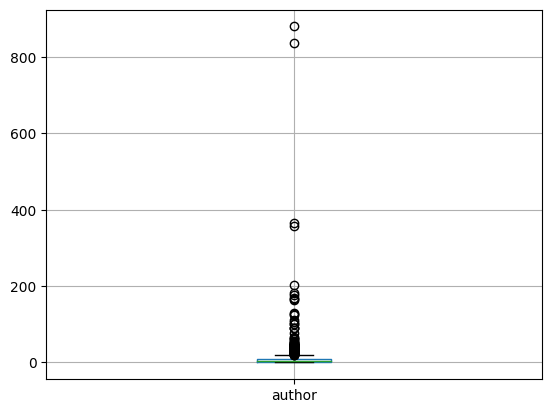

In [52]:
# boxplot again but exlude values above 2000
proposal_authorship_stats[proposal_authorship_stats['author'] < 2000].boxplot(column=['author'])

<Axes: >

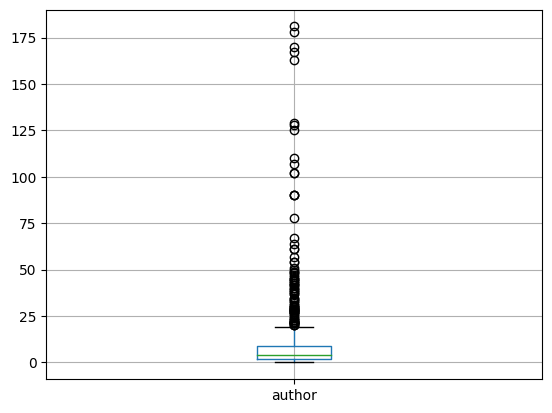

In [54]:
# boxplot again but exlude values above 200
proposal_authorship_stats[proposal_authorship_stats['author'] < 200].boxplot(column=['author'])

In [57]:
proposal_authorship_stats.author.describe([.25, .5, .75, .90, .99])

count      607.000000
mean        38.695222
std        568.839120
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
90%         31.000000
99%        180.820000
max      13958.000000
Name: author, dtype: float64

- 99% of large organizations have less than 180 unique authors
- 90% of large organizations have less than 31 unique authors
- 75% of large organizations have less than 9 unique authors
- 50% of large orgs have less than 4

### repeat authorship

In [58]:
proposals_with_orgs.head()

,platform,platform_deployment_id,proposal_id,author,date,votes_count,organization_id,organization_type
0,daostack,0x294f999356ed03347c7a23bcbcf8d33fa41dc830,0x0025c38d987acba1f1d446d3690384327ebe06d15f1f...,0xbaaea72417f4dc3e0f52a1783b0913d0f3516634,2019-10-22 10:07:58,8,3668a12c-85eb-45c8-ac83-aae266de29e3,deepdao
2,daostack,0x519b70055af55a007110b4ff99b0ea33071c720a,0x003c109411e96e5607ce609278536262e12afdaa65ab...,0xb33b9fba681653fe263b31a95766d83d18c2128d,2020-03-14 17:52:32,5,c9db5a89-025e-4cfd-9a7f-552d86add137,deepdao
3,daostack,0x8990e11b69403ea53ef2b32434bbd7dbf84b5234,0x0071c649968f7939fc9729c5dc25a8ae3f50dc86220a...,0x86fd6dd41bad636b5b3b9228bc5642fa0df392e8,2019-12-14 14:52:54,1,a7ebb52d-cfeb-479d-ba4f-21e460eb1773,deepdao
4,daostack,0x440583455bcd85ab2bd429c015d3aabcae135f0a,0x007eaf0fc8d6ae35ba3f28bc7cf4b34af659db8161d4...,0x7cb9032844e722bef2e16a761832c59c96550898,2019-11-01 19:26:29,1,5d553ae9-09db-595b-8ca9-413b792a1def,single
5,daostack,0x519b70055af55a007110b4ff99b0ea33071c720a,0x00a6fff3bc39d362f1153029f9105ea14c080ebbf475...,0xd97672177e0673227fa102c91bfa8b8cfa825141,2021-08-15 11:51:26,1,c9db5a89-025e-4cfd-9a7f-552d86add137,deepdao


In [59]:
# we want to know, for each orgnization, how many authors have submitted more than 1 proposal
# first, we need to get a list of authors for each organization
authors_by_org = proposals_with_orgs.groupby('organization_id').agg({'author': 'unique'})
authors_by_org.head()

,author
organization_id,
008ff65f-0624-566a-b4b8-e18c1d7bdd27,"[0xbb7e930576043b55f1d011802c9588fa15a956b3, 0..."
00a78a4c-6892-406e-8587-44c5bd6a10ed,"[0x994B5C8B30766EaCe220B76f8C1DE27849f05aB3, 0..."
00cdddf8-87e0-4e3f-9b36-f627133e0b24,"[0xDa4529997118e610c925150AEA0c09B89Cde7537, 0..."
01091ef6-e165-4104-8228-ceb07e5c55e2,[0x5Be0feE0f748c1737793172D42c14E4810D2038E]
010e9cab-473e-5457-88ab-f7321880fe7e,[eip155:1:0x58BA5a24fa8833477339072f1221E03bB3...


In [60]:
# now we need to count the number of authors in each list that have more than 1 proposal
authors_by_org['authors_with_multiple_proposals'] = authors_by_org['author'].apply(lambda x: len([a for a in x if len(proposals_with_orgs[proposals_with_orgs['author'] == a]) > 1]))
authors_by_org.head()

,author,authors_with_multiple_proposals
organization_id,,
008ff65f-0624-566a-b4b8-e18c1d7bdd27,"[0xbb7e930576043b55f1d011802c9588fa15a956b3, 0...",23
00a78a4c-6892-406e-8587-44c5bd6a10ed,"[0x994B5C8B30766EaCe220B76f8C1DE27849f05aB3, 0...",1
00cdddf8-87e0-4e3f-9b36-f627133e0b24,"[0xDa4529997118e610c925150AEA0c09B89Cde7537, 0...",2
01091ef6-e165-4104-8228-ceb07e5c55e2,[0x5Be0feE0f748c1737793172D42c14E4810D2038E],1
010e9cab-473e-5457-88ab-f7321880fe7e,[eip155:1:0x58BA5a24fa8833477339072f1221E03bB3...,2


<Axes: >

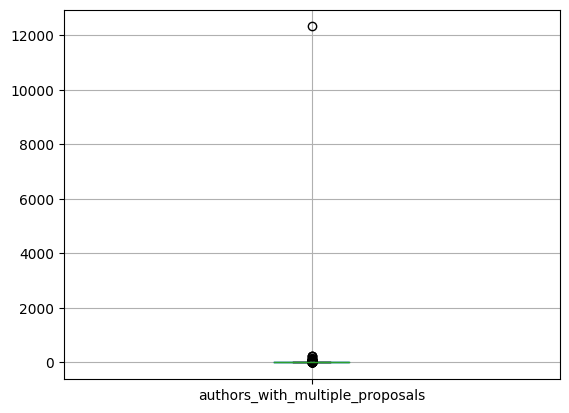

In [61]:
authors_by_org.boxplot(column=['authors_with_multiple_proposals'])

<Axes: >

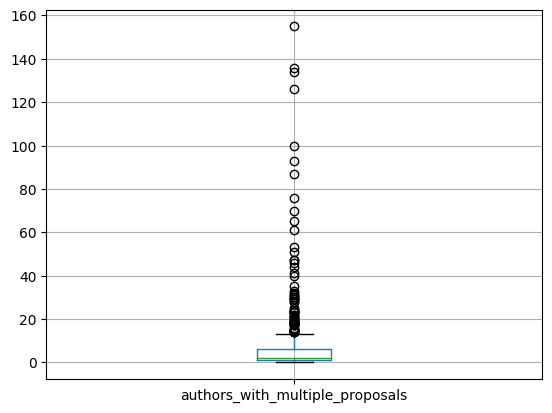

In [62]:
# redo for less than 200
authors_by_org[authors_by_org['authors_with_multiple_proposals'] < 200].boxplot(column=['authors_with_multiple_proposals'])

In [63]:
# describe
authors_by_org.authors_with_multiple_proposals.describe([.25, .5, .75, .90, .99])

count      607.000000
mean        28.355848
std        500.411974
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
90%         18.000000
99%        133.520000
max      12325.000000
Name: authors_with_multiple_proposals, dtype: float64

- 99% of large organizations have less than 133 **repeat** authors
- 90% of large organizations have less than 18 **repeat** authors
- 75% of large organizations have less than 6 **repeat** authors
- 50% of large orgs have less than 2 (!!)